
<h1 align=center style="line-height:200%;font-family:vazir;color:#000000">
<font face="vazir" color="#000000">
</font>
</h1>
<h2 align=center style="line-height:200%;font-family:vazir;color:#000000">
<font face="vazir" color="#000000">
  پروژه 1 یادگیری تقویتی
</font>
</h2>
<h2 align=right style="line-height:200%;font-family:vazir;color:#000000">
<font face="vazir" color="#000000">
  نام: سحر آقاخانی
</font>
</h2>
<h2 align=right style="line-height:200%;font-family:vazir;color:#000000">
<font face="vazir" color="#000000">
  شماره دانشجویی: -
</font>
</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
np.random.seed(seed=2024)



#Part 1:
create a function to produce random numbers from normal distribution with a mean of q*(a) and variance of σ^2


---


##part 1 reuslt:
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تابع تعریف شده با گرفتن یک میانگین و واریانس و تعداد مورد نظر، به تعداد مورد نظر عدد رندوم  با توزیع نرمال و میانگین و واریانس خاص تولید میکند.
</font>
</p>

In [2]:
def Normal_dist( mu , var, count = None):
  stdev = np.sqrt(var)
  return np.random.normal(loc=mu , scale = stdev, size = count)



#Part 2:
assume σ^2 is 1 and n is 10 and means are as shown in page 28.

In [3]:
q = [0.25, -0.8, 1.5, 0.4, 1.1, -1.5, -0.2, -1, 0.9, -0.4] # approx. means on page 28
var = 1
n = 10

#Part 3:
assuming each run has `1000` steps and the system is run for `2000` times, plot the average reward vs steps using greedy and ϵ-greedy with `ϵ = 0.01` and `ϵ= 0.1`

---
#Part 3 result:
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>update_reward</code>: این تابع، با توجه به رابطه 2.3 کتاب برای به روز رسانی ارزش حالت-عمل ها در هر مرحله استفاده می شود.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>Run_system</code>: این تابع، با روش انتخاب شبه حریصانه، عمل بهینه را انتخاب میکند. برای حالت حریصانه کافی است مقدار اپسیلون برابر 0 قرار داده شود.
نمودار مقایسه سه حالت حریصانه، شبه حریصانه با اپسیلون های 0.1 و 0.01 نیز رسم شده است که مشابه نتایج موجود در کتاب است.
</font>
</p>


In [4]:
runs = 2000
steps = 1000
epsilon = 0.1
def update_reward(Q_k , k , reward ):

  return Q_k + (reward - Q_k)/k



def Run_system(q , var, n ,runs, steps, epsilon, mode=None):

  optimal_action = np.argmax(q)
  average_reward = np.zeros(steps)
  optimal_action_count = np.zeros(steps)
  for run in range(runs):
    clear_output(wait=True)
    print(f"{mode}: running for the {run+1}th time")
    estimated_reward = np.zeros(n)
    action_counts = np.zeros(n)
    for step in range(steps):
      max_reward =  np.max(estimated_reward)
      if np.random.rand() < epsilon:
        action_indices = np.where(estimated_reward < max_reward)[0]
      else:
        action_indices = np.where(estimated_reward == max_reward)[0]
      if action_indices.size == 0:
        action_indices = np.arange(n)
      action = np.random.choice(action_indices)
      action_counts[action] +=1
      if action == optimal_action:
        optimal_action_count[step] +=1
      reward =  Normal_dist(mu = q[action], var = var)
      estimated_reward[action] = update_reward(Q_k=estimated_reward[action] , k =action_counts[action] , reward = reward )
      average_reward[step] += reward
  average_reward/=runs
  optimal_action_count=optimal_action_count/runs*100
  return average_reward , optimal_action_count




In [5]:
greedy, greedy_percent = Run_system(q , var, n ,runs, steps, epsilon =0, mode= 'greedy')
egreedy_1 , egreedy1_percent =  Run_system(q , var, n ,runs, steps, epsilon =0.1, mode = 'epsilon = 0.1')
egreedy_01,  egreedy01_percent=  Run_system(q , var, n ,runs, steps, epsilon =0.01,mode = 'epsilon = 0.01')


epsilon = 0.01: running for the 2000th time


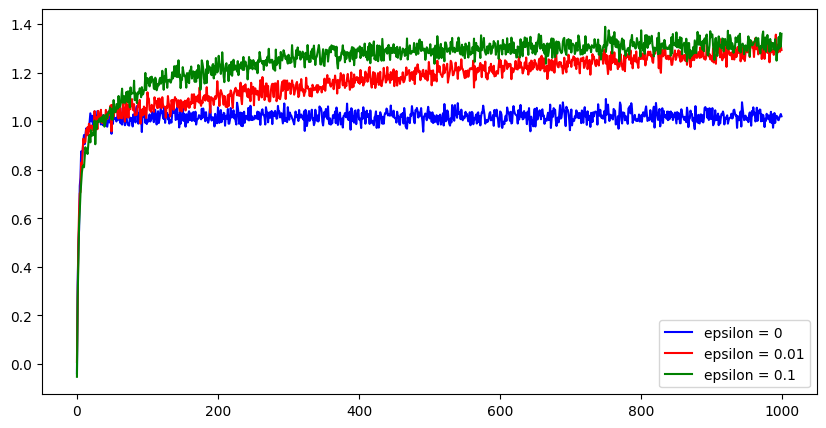

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
axes.plot(range(steps),greedy,color='blue', label ='epsilon = 0' );
axes.plot(range(steps),egreedy_01,color='red', label ='epsilon = 0.01' );
axes.plot(range(steps),egreedy_1,color='green', label ='epsilon = 0.1' );

axes.legend();

#Part 4 & 5:

## Part 4:

use Softmax search method instead of greedy for the system. assume `T=1`

---

##Part 4 result:
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>softmax</code>:
این تابع با گرفتن آرایه ای از پاداش‌های تخمین زده شده و ثابت دما، میزان تابع سافت مکس آن (احتمال ) را خروجی می دهد.
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>Temperature_schedule</code>:
این تابع با داشتن شماره قدم و نرخ کاهش و همچنین ثابت اولیه دما، میزان ثابت دمایی را به صورت نمایی در هر قدم کاهش داده و ثابت دمایی در هر قدم را محاسبه میکند.اگر نرخ کاهش 1 در نظر گرفته شود، به این معنا است که ضریب دمایی ثابت می ماند.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>Run_softmax</code>:
این تابع از روش جستجوی سافت مکس برای انتخاب عمل بهینه انتخاب می کند.
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش به جای روش جستجوی حریصانه از جستجوی بر اساس روش سافت مکس استفاده شده است. همانطور که در نمودار مشاهده می شود، اگر در طی جستجو ثابت دما برابر 1 در نظر گرفته شود، نتیجه خوبی نخواهد داشت و نتایج آن مشابه عملکرد حریصانه است. علت آن این است که هر چه ثابت دما بالاتر باشد، کاوش در فضای مساله بیشتر خواهد بود. ولی در این مساله نیاز است که ابتدا کاوش در فضای مساله انجام شود تا عامل راه حل بهینه را پیدا کرده و رفته رفته میزان کاوش کمتر شود. به همین دلیل بهتر است که با برنامه ریزی ثابت دمایی، مقدار آن را متغیر در نظر گرفت. به همین دلیل، علاوه بر خواسته مساله، حالتی که ثابت دمایی آن از 1 شروع شده و به صورت نمایی کاهش می یابد نیز رسم شده است. مشاهده می شود که این حالت نتیجه بهتری از سایر روش ها دارد.
</font>
</p>

---

##Part 5:
plot the percentage of optimal actions that were chosen vs steps.

---

##Part 5 result:
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش نیز درصد انتخاب عمل بهینه در هر قدم رسم شده است. همانگونه که مشاهده می شود، عملکرد بهینه مربوط به سافت مکس با کاهش ضریب دمایی است.
</font>
</p>

In [7]:
def softmax(x, T):
  return np.exp(x/T)/np.sum(np.exp(x/T))

def Temperature_schedule(step, steps , decay, T0):
  return T0 * decay ** (step / steps)

def Run_softmax(q , var, n ,runs, steps, T0,decay=1, mode=None):
  optimal_action = np.argmax(q)
  average_reward = np.zeros(steps)
  optimal_action_count = np.zeros(steps)
  for run in range(runs):
    clear_output(wait=True)
    print(f"{mode}: running for the {run+1}th time")
    estimated_reward = np.zeros(n)
    action_counts = np.zeros(n)
    for step in range(steps):
      action_indices = np.arange(n)
      T = Temperature_schedule(step,steps, decay, T0)
      action = np.random.choice(a = action_indices, p = softmax(estimated_reward, T=T))
      action_counts[action] +=1
      if action == optimal_action:
        optimal_action_count[step] +=1
      reward =  Normal_dist(mu = q[action], var = var)
      estimated_reward[action] = update_reward(Q_k=estimated_reward[action] , k =action_counts[action] , reward = reward )
      average_reward[step] += reward
  average_reward/=runs
  optimal_action_count=optimal_action_count/runs*100

  return average_reward,optimal_action_count



In [8]:

softmax_1, softmax_nodecay_percent = Run_softmax(q , var, n ,runs, steps, T0 =1, decay =1,  mode='T=1, decay=0')


T=1, decay=0: running for the 2000th time


In [9]:
softmax_scheduled,softmax_withdecay_percent = Run_softmax(q , var, n ,runs, steps, T0 =1, decay =0.01,  mode='T0=1')

T0=1: running for the 2000th time


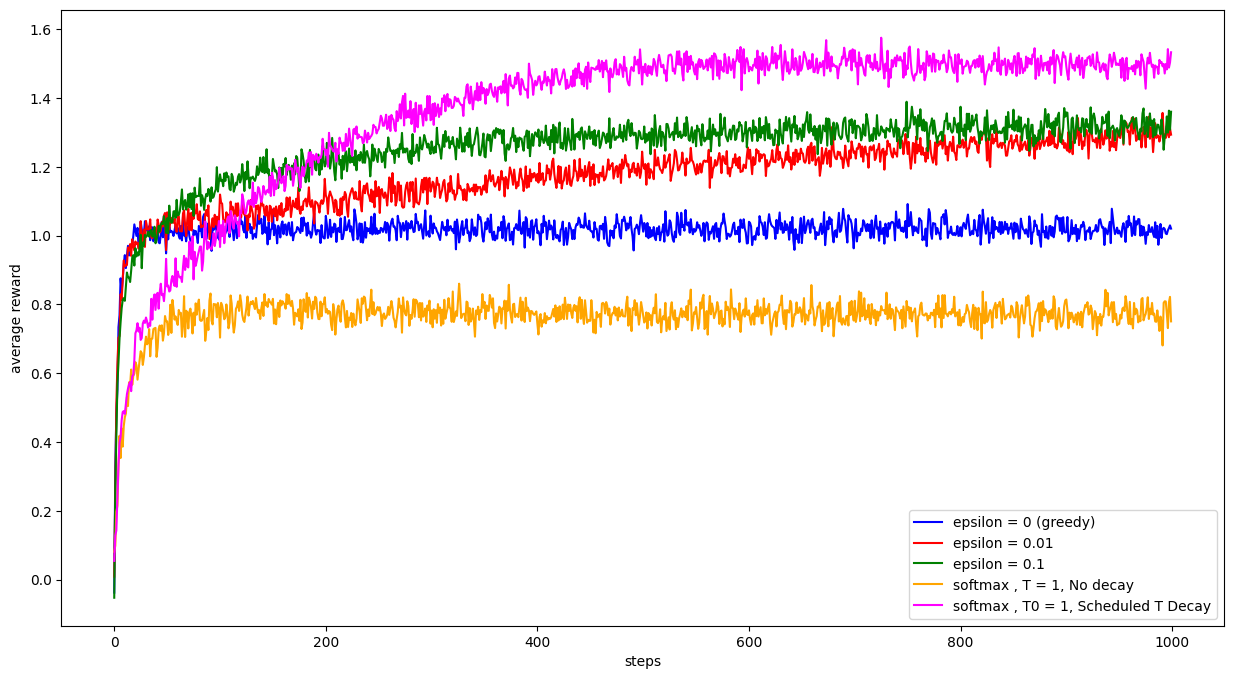

In [18]:
fig1, axes1 = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
axes1.plot(range(steps),greedy,color='blue', label ='epsilon = 0 (greedy)' )
axes1.plot(range(steps),egreedy_01,color='red', label ='epsilon = 0.01' )
axes1.plot(range(steps),egreedy_1,color='green', label ='epsilon = 0.1' )
axes1.plot(range(steps),softmax_1,color='orange', label ='softmax , T = 1, No decay' )
axes1.plot(range(steps),softmax_scheduled,color='magenta', label ='softmax , T0 = 1, Scheduled T Decay' )
axes1.set_xlabel('steps')
axes1.set_ylabel('average reward')

axes1.legend();




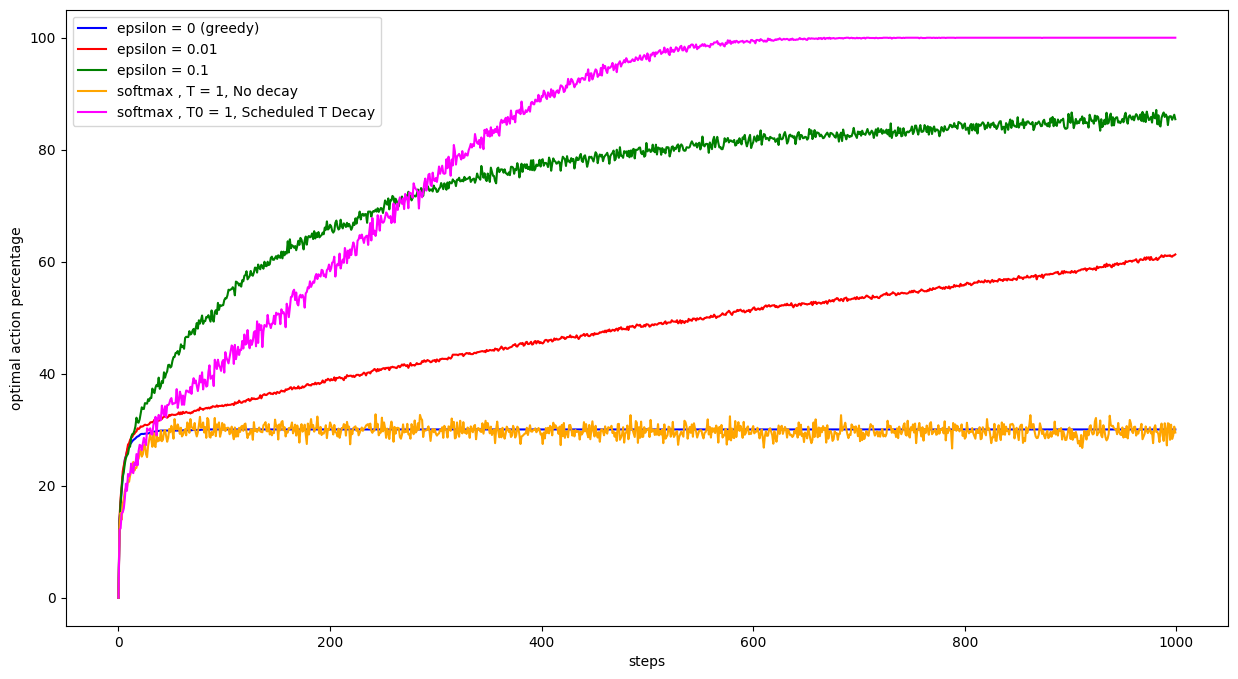

In [20]:
fig2, axes2 = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
axes2.plot(range(steps),greedy_percent,color='blue', label ='epsilon = 0 (greedy)' );
axes2.plot(range(steps),egreedy01_percent,color='red', label ='epsilon = 0.01' );
axes2.plot(range(steps),egreedy1_percent,color='green', label ='epsilon = 0.1' );
axes2.plot(range(steps),softmax_nodecay_percent,color='orange', label ='softmax , T = 1, No decay' );
axes2.plot(range(steps),softmax_withdecay_percent,color='magenta', label ='softmax , T0 = 1, Scheduled T Decay' );
axes2.set_xlabel('steps')
axes2.set_ylabel('optimal action percentage')
axes2.legend();